In [2]:
# read the csv file
import pandas as pd
df = pd.read_csv('/content/judge-1377884607_tweet_product_company.csv', encoding='latin1')
df.head()


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [39]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9092 entries, 0 to 9092
Data columns (total 4 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   is_there_an_emotion_directed_at_a_brand_or_product  9092 non-null   object
 2   clean_text                                          9092 non-null   object
 3   label                                               9092 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 355.2+ KB


In [40]:
df.isnull().sum()


,0
tweet_text,0
is_there_an_emotion_directed_at_a_brand_or_product,0
clean_text,0
label,0


In [41]:
df = df[['tweet_text', 'is_there_an_emotion_directed_at_a_brand_or_product']]
df.head()

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [43]:
df['is_there_an_emotion_directed_at_a_brand_or_product'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].fillna('No emotion toward brand or product')
df.dropna(subset=['tweet_text'], inplace=True)


/tmp/ipython-input-1300973245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_there_an_emotion_directed_at_a_brand_or_product'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].fillna('No emotion toward brand or product')
/tmp/ipython-input-1300973245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['tweet_text'], inplace=True)


In [44]:
# clean the tweet text
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", '', text)
    text = re.sub(r'@\w+|#', '', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text

df['clean_text'] = df['tweet_text'].apply(clean_text)
df.head()


/tmp/ipython-input-1429116481.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['tweet_text'].apply(clean_text)


,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product,clean_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,i have a 3g iphone after 3 hrs tweeting at ri...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,know about awesome ipadiphone app that youl...
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,can not wait for ipad 2 also they should sale...
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,i hope this years festival isnt as crashy as ...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,great stuff on fri sxsw marissa mayer google ...


In [45]:
# encode the labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label'] = le.fit_transform(df['is_there_an_emotion_directed_at_a_brand_or_product'])
df.head()


,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product,clean_text,label
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,i have a 3g iphone after 3 hrs tweeting at ri...,1
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,know about awesome ipadiphone app that youl...,3
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,can not wait for ipad 2 also they should sale...,3
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,i hope this years festival isnt as crashy as ...,1
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,great stuff on fri sxsw marissa mayer google ...,3


In [46]:
# check label counts
df['label'].value_counts()


,count
label,
2,5388
3,2978
1,570
0,156


In [47]:
# split the dataset
from sklearn.model_selection import train_test_split

X = df['clean_text'].values
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

len(X_train), len(X_test)


(7273, 1819)

In [57]:
# tokenize and pad text
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = 50
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

X_train_pad.shape, X_test_pad.shape


((7273, 50), (1819, 50))

In [58]:
# build the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=64, input_length=max_len))
model.add(Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.3)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(len(le.classes_), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [60]:
# train the model
history = model.fit(X_train_pad, y_train, validation_split=0.1, epochs=5, batch_size=64, verbose=1)


Epoch 1/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 24s 146ms/step - accuracy: 0.5476 - loss: 1.0596 - val_accuracy: 0.6126 - val_loss: 0.8841
Epoch 2/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 14s 138ms/step - accuracy: 0.5999 - loss: 0.8973 - val_accuracy: 0.6387 - val_loss: 0.8175
Epoch 3/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 21s 139ms/step - accuracy: 0.7236 - loss: 0.7185 - val_accuracy: 0.6511 - val_loss: 0.8100
Epoch 4/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 20s 138ms/step - accuracy: 0.8003 - loss: 0.5401 - val_accuracy: 0.6621 - val_loss: 0.8243
Epoch 5/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 21s 140ms/step - accuracy: 0.8431 - loss: 0.4347 - val_accuracy: 0.6841 - val_loss: 0.9128


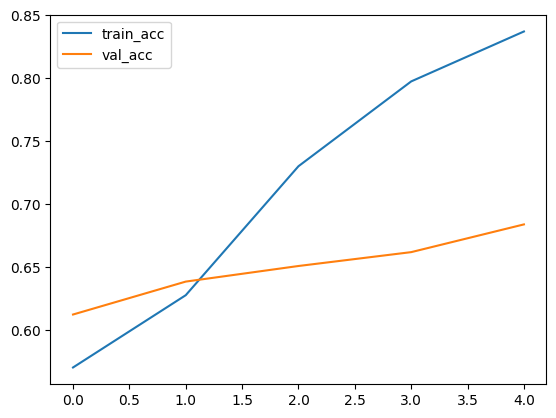

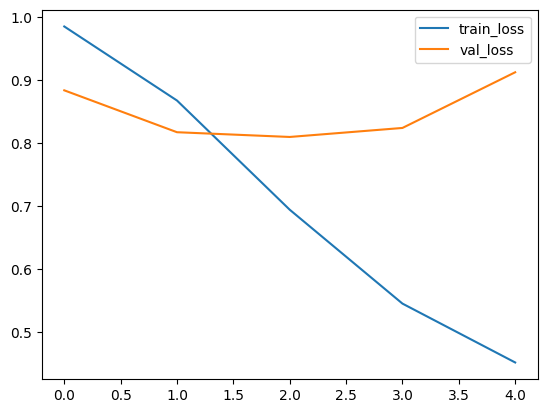

In [61]:
# plot accuracy and loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


In [62]:
# test accuracy
loss, acc = model.evaluate(X_test_pad, y_test, verbose=0)
print("Test Accuracy:", acc)


Test Accuracy: 0.646509051322937


In [63]:
# classification report
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred_probs = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_probs, axis=1)

print(classification_report(y_test, y_pred, target_names=le.classes_))


57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step
                                    precision    recall  f1-score   support

                      I can't tell       0.00      0.00      0.00        31
                  Negative emotion       0.38      0.42      0.40       114
No emotion toward brand or product       0.70      0.78      0.74      1078
                  Positive emotion       0.58      0.48      0.52       596

                          accuracy                           0.65      1819
                         macro avg       0.42      0.42      0.42      1819
                      weighted avg       0.63      0.65      0.64      1819



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[[  0   4  21   6]
 [  0  48  51  15]
 [  0  48 842 188]
 [  0  25 285 286]]


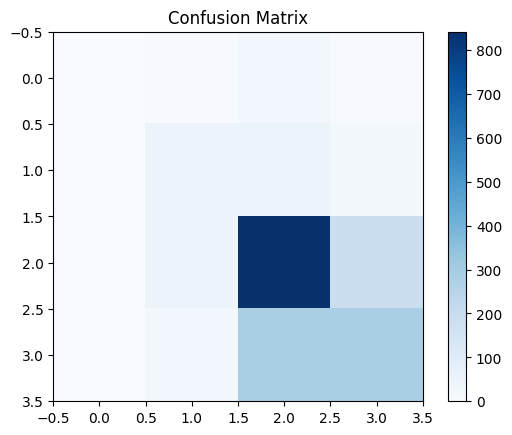

In [64]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()


In [65]:
# sample predictions
for i in range(5):
    print("Tweet:", X_test[i])
    print("True:", le.inverse_transform([y_test[i]])[0])
    print("Pred:", le.inverse_transform([y_pred[i]])[0])
    print("-"*80)


Tweet: congrats rt  yes gowalla wins best andoid app at the team android choice awards thanks all sxsw
True: Positive emotion
Pred: Positive emotion
--------------------------------------------------------------------------------
Tweet: hey tweeps a web industry party calendar u can put on ur iphone or ical amp keep track of whats goin on at sxsw link
True: Positive emotion
Pred: No emotion toward brand or product
--------------------------------------------------------------------------------
Tweet: omg the line for the ipad2 at austins apple store is long alot of sxsw badges link
True: No emotion toward brand or product
Pred: Positive emotion
--------------------------------------------------------------------------------
Tweet: spearheading japan disaster relief from sxsw via twitter amp iphone socialgood philanthropy
link
True: No emotion toward brand or product
Pred: No emotion toward brand or product
--------------------------------------------------------------------------------

In [66]:
# save model and tokenizer
import pickle

model.save("sentiment_lstm_model.h5")

with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

print("Model saved.")
model.save("sentiment_lstm_model.keras")


Model saved.
